# Rawfear

In [45]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import squarify # pip install squarify
import seaborn as sns
import plotly.express as px # Requires: pip install plotly
from wordcloud import WordCloud

In [46]:
file_path = '/Users/meredithsmith/Desktop/TØPAnalysis/BreachSongs2.xlsx'
df = pd.read_excel(file_path)

In [47]:
stop_words = [
    "i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your",
    "yours", "he", "him", "his", "she", "her", "it", "its", "they", "them",
    "their", "what", "which", "who", "whom", "this", "that", "these", "those",
    "am", "is", "are", "was", "were", "be", "been", "being", "have", "has",
    "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and",
    "but", "if", "or", "because", "as", "until", "while", "of", "at", "by",
    "for", "with", "about", "against", "between", "into", "through", "during",
    "before", "after", "above", "below", "to", "from", "up", "down", "in",
    "out", "on", "off", "over", "under", "again", "further", "then", "once",
    "not", "no", "yes", "so", "can", "just", "dont", "yeah", "let", "im", "ah",
    "want", "like", "ive", "all", "ooh", "ill", "even", "forforforforforfor",
    "yeahyeahyeahyeah", "daisychained" "thats", "there"
]

# Function to remove stop words from a string
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return " ".join(filtered_words)

# Apply to your column
# df1=filtered_df.copy()
# df1['unique'] = df1['unique'].apply(remove_stopwords)

lyrics = """Raw fear
 Raw fear

 Raw fear moves me, sounds of empty Uzis
 Life is just forever nipping heels, never slowing down
 Raw fear moves me, sounds of empty Uzis
 Life is just forever gripping feels, never slowing down

 You know what scares me? Nah, it's stupid
 You've met my fears, they're all regulars
 Wait, who's the new kid?
 You know what kills me? Not getting stronger
 And now I can't seem to sit still any longer

 Raw fear moves me, sounds of empty Uzis
 Life is just forever nipping heels, never slowing down
 Raw fear moves me, sounds of empty Uzis
 Life is just forever gripping feels, never slowing down
 (I can't seem to sit still any longer)
 Raw fear moves me, sounds of empty Uzis
 Life is just forever gripping feels, never slowing down

 (Never slowing down)
 (Never slowing down)
 (Never, never slowing down)
 (Never slowing down)
 (Never, never slowing down)
 (Never slowing down)
 (Never, never slowing down)

 Learning all that really matters is a slow and painful lesson (Never slowing down, never slowing down)
 It is not pass or fail, but a poisonous progression (Never slowing down, never slowing down)
 Try to micro-dose to immunity but you'll never, ever get it (Never slowing down, never slowing down)
 And I go, ah, ah, ah (Never slowing down)
 What's the matter? isn't helping (Never slowing down)
 You go, ooh, ooh, ooh (Never slowing down)
 I wish her parents would stop yelling (Never slowing down)
 I could build a tower with the times I was pretending (Never slowing down)
 Try to micro-dose to immunity but I'll never see the ending (Never slowing down)
 And I go, ah, ah, ah (Never slowing down)
  What's the matter? isn't helping (Never slowing down)
 You go, ooh, ooh, ooh (Never slowing down)
 I wish her parents would stop yelling
 You know what scares me? (Ah, ah, ah)
 Nah, it's stupid
 And you go, ooh, ooh, ooh
 Wait, who's the new kid? (Never slowing down)
 And you go, ah, ah, ah
 Not getting stronger
 And now I can't seem to sit still any longer

 Raw fear moves me, sounds of empty Uzis (Ah, ah, ah)
 Life is just forever nipping heels, never slowing down
 Raw fear moves me, sounds of empty Uzis (Ah, ah, ah)
 Life is just forever gripping feels, never slowing down
 Raw fear moves me, sounds of empty Uzis (Ah, ah, ah)
 Life is just forever nipping heels, never slowing down
 Raw fear moves me, sounds of empty Uzis (Ah, ah, ah)
 Life is just forever gripping feels, never slowing down"""


In [48]:
# 1. Normalize: lowercase and remove punctuation
# We do this first so "Sun." becomes "sun"
clean_lyrics = re.sub(r'[^\w\s]', '', lyrics.lower())

# 2. Filter: Use your function directly on the string
# No .apply() needed for standard strings
filtered_lyrics = remove_stopwords(clean_lyrics)

# 3. Split: Break the string into a list of words
words = filtered_lyrics.split()

# 4. Tally: Count occurrences
counts = Counter(words)

# 5. Output: View the most frequent meaningful words
print(counts.most_common(10))

[('never', 37), ('slowing', 32), ('raw', 11), ('fear', 11), ('moves', 9), ('sounds', 9), ('empty', 9), ('uzis', 9), ('life', 9), ('forever', 9)]


### Rawfear Bar Chart

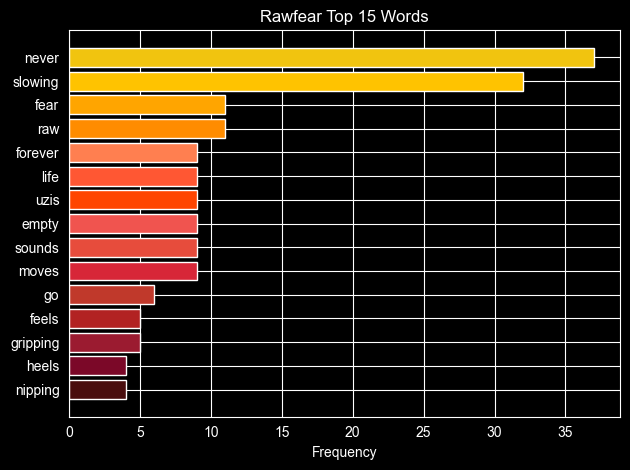

In [49]:
# Convert your Counter object to a sorted DataFrame
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
df_counts = df_counts.sort_values(by='Count', ascending=True)

# Define Red/Orange/Yellow palette
warm_colors = [
    '#4A0E0E', # Dark Garnet
    '#7B0828', # Deep Ruby
    '#9B1B30', # Chili Pepper
    '#B22222', # Firebrick
    '#C0392B', # Pomegranate
    '#D72638', # Crimson
    '#E74C3C', # Alizarin
    '#F0544F', # Soft Coral
    '#FF4500', # Orange Red
    '#FF5733', # Persimmon
    '#FF7F50', # Coral
    '#FF8C00', # Dark Orange
    '#FFA500', # Orange
    '#FFC300', # Sunflower
    '#F1C40F'  # Maize
]

# Create the plot
plt.barh(df_counts['Word'], df_counts['Count'], color=warm_colors)
plt.xlabel('Frequency')
plt.title('Rawfear Top 15 Words')
plt.tight_layout()

# Save or display
plt.savefig('rawfear_bar.png')

### Rawfear Lollipop

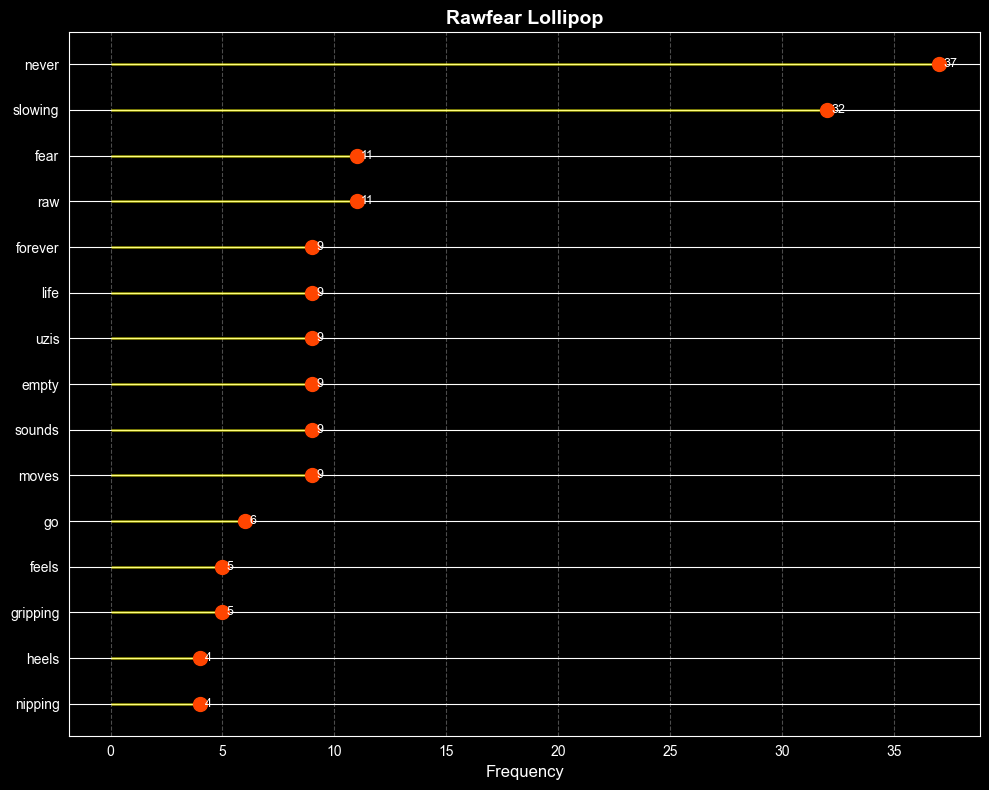

In [50]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
# Sorting ensures the "longest" lollipops are at the top
df_counts = df_counts.sort_values(by='Count', ascending=True)

# 2. Create the plot
plt.figure(figsize=(10, 8))

# Draw the "stems" (horizontal lines)
plt.hlines(y=df_counts['Word'], xmin=0, xmax=df_counts['Count'], color='yellow', alpha=0.5, linewidth=2)

# Draw the "candies" (the dots)
plt.plot(df_counts['Count'], df_counts['Word'], "o", markersize=10, color='orangered')

# 3. Styling
plt.xlabel('Frequency', fontsize=12)
plt.title('Rawfear Lollipop', fontsize=14, fontweight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.3) # Horizontal grids help track the values

# Add labels to the end of the dots (optional)
for i, count in enumerate(df_counts['Count']):
    plt.text(count + 0.2, i, str(count), va='center', fontsize=9)

plt.tight_layout()

# 4. Save or display
plt.savefig('rawfear_lollipop.png')
plt.show()

### Rawfear Bubble Chart

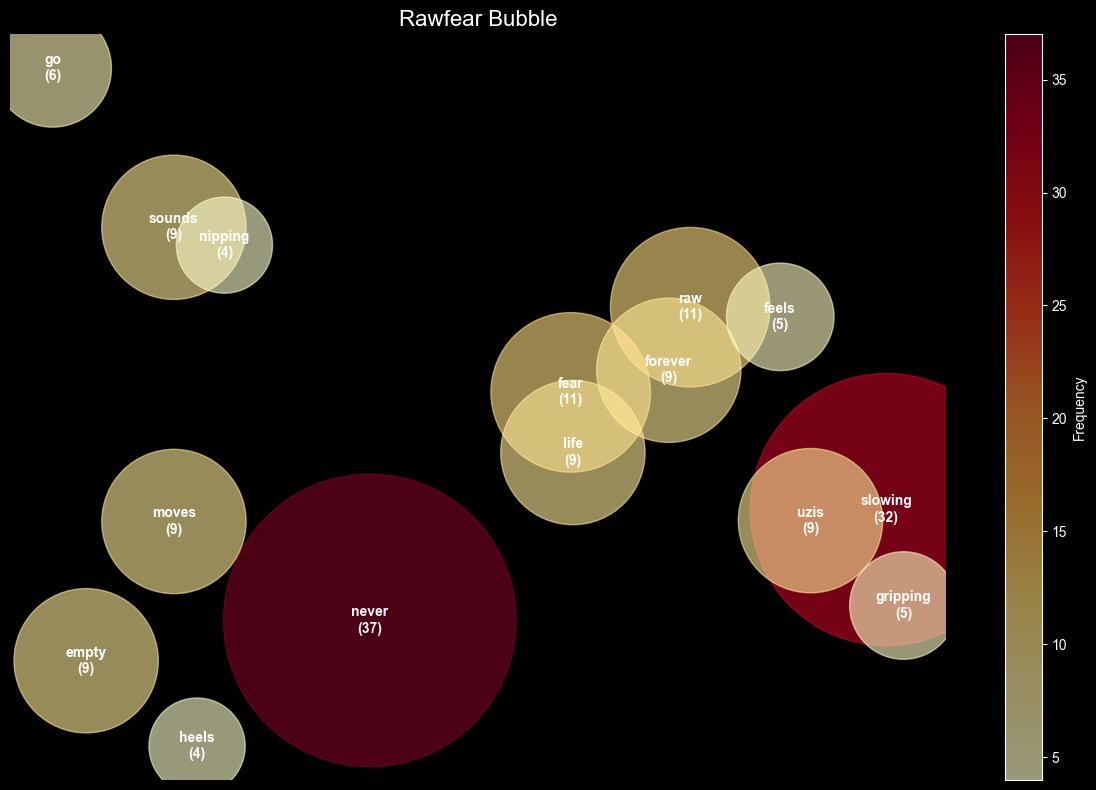

In [51]:
# 1. Prepare your data (from your existing code)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Setup positions for the bubbles (random or ordered)
# We use random X and Y coordinates to spread the bubbles out
np.random.seed(42) # Keeps the layout the same every time you run it
df_counts['x'] = np.random.rand(15)
df_counts['y'] = np.random.rand(15)

# 3. Create the plot
plt.figure(figsize=(12, 8))

# s= size of bubbles (multiplied by a factor to make them visible)
# c= color (can be mapped to the count)
scatter = plt.scatter(
    df_counts['x'],
    df_counts['y'],
    s=df_counts['Count'] * 1200,  # Adjust the multiplier (100) based on your data scale
    c=df_counts['Count'],
    cmap='YlOrRd',
    alpha=0.6,
)

# 4. Add the word labels inside or near the bubbles
for i, row in df_counts.iterrows():
    plt.annotate(
        f"{row['Word']}\n({row['Count']})",
        (row['x'], row['y']),
        ha='center',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

# 5. Styling
plt.title('Rawfear Bubble', fontsize=16)
plt.axis('off') # Hide axes for a cleaner "cloud" look
plt.colorbar(scatter, label='Frequency') # Optional: adds a color scale legend

plt.tight_layout()
plt.savefig('rawfear_bubble.png')
plt.show()

### Rawfear Treemap

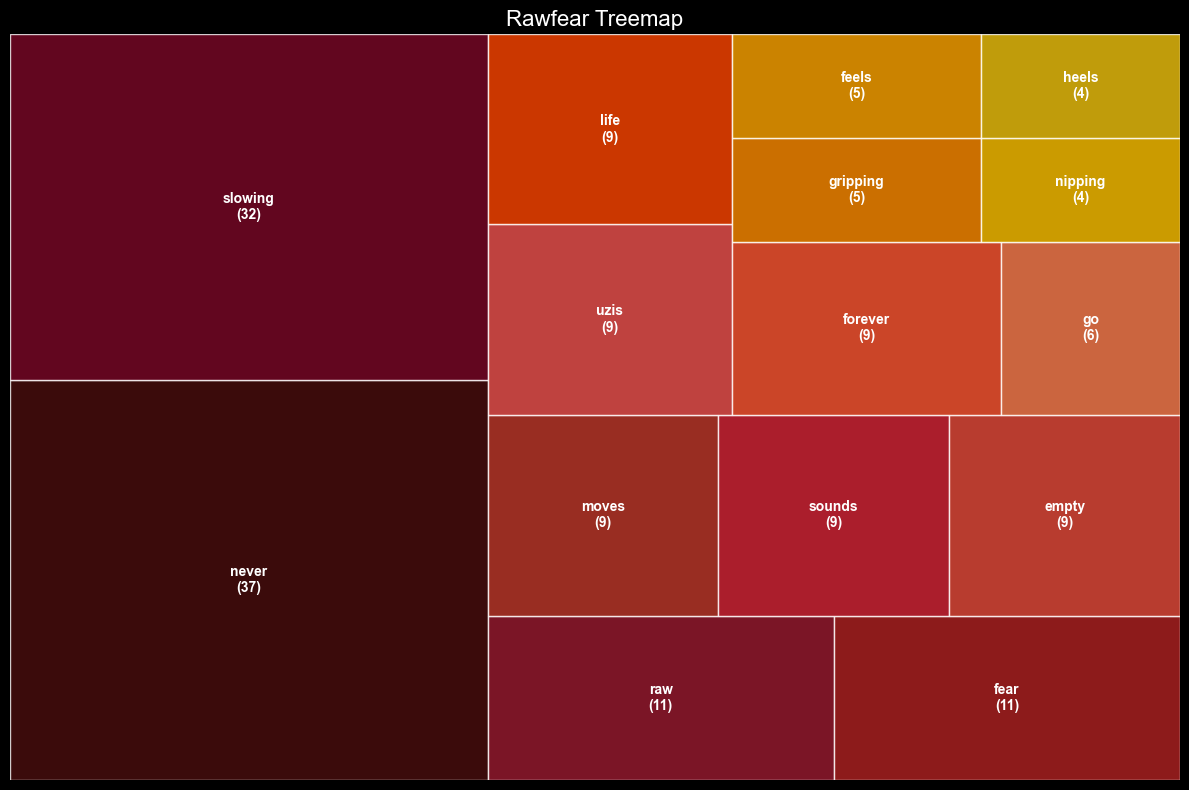

In [52]:
# 1. Prepare your data (from your existing Counter object)
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

# 2. Create the plot
plt.figure(figsize=(12, 8))

# Define colors (using a nice Seaborn palette)
colors = sns.color_palette('viridis', len(df_counts))

# Create labels that include the word and the count
labels = [f"{row['Word']}\n({row['Count']})" for i, row in df_counts.iterrows()]

# 3. Draw the Treemap
squarify.plot(
    sizes=df_counts['Count'],
    label=labels,
    color=warm_colors,
    alpha=0.8,
    text_kwargs={'fontsize': 10, 'fontweight': 'bold'}
)

# 4. Styling
plt.title('Rawfear Treemap', fontsize=16)
plt.axis('off') # Treemaps don't need axes

plt.tight_layout()
plt.savefig('rawfear_treemap.png')
plt.show()

## RawFear Word Cloud

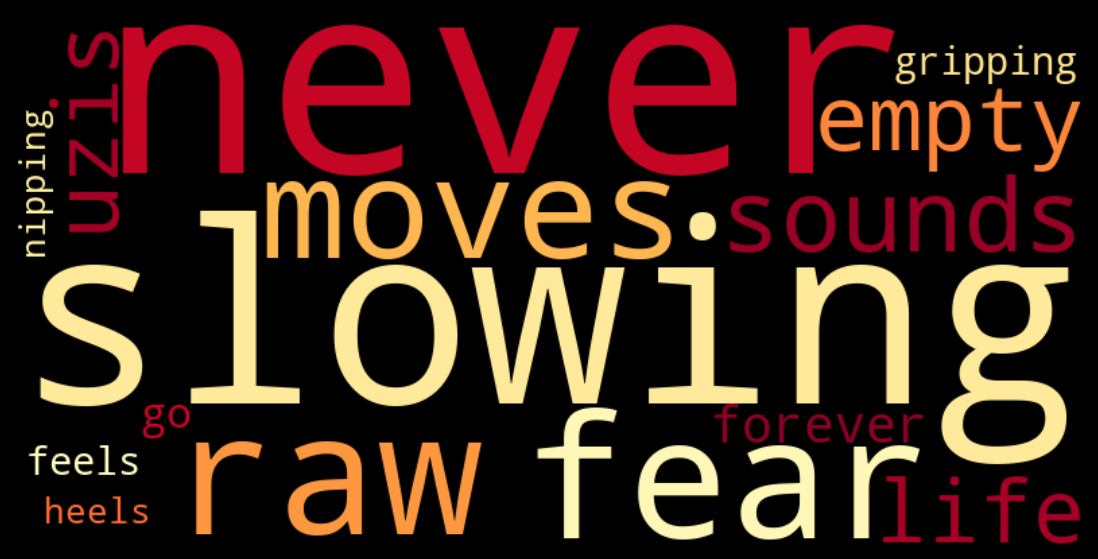

In [53]:
# Join all words into one string weighted by their count
word_freq = dict(counts.most_common(15))

wordcloud = WordCloud(
    width=800,
    height=400,
    colormap='YlOrRd',
).generate_from_frequencies(word_freq)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Rawfear Radial Bar Chart

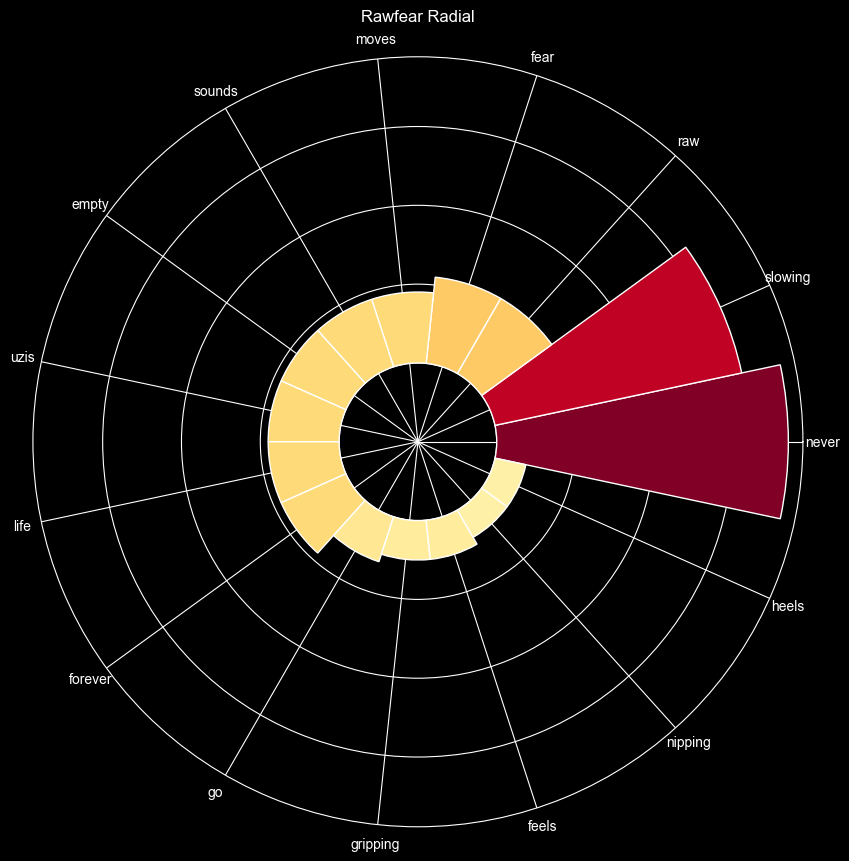

In [54]:
# Prepare data
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])
n = len(df_counts)
angles = np.linspace(0, 2 * np.pi, n, endpoint=False)
widths = [2 * np.pi / n] * n

plt.figure(figsize=(10, 10))
ax = plt.subplot(111, polar=True)

# Create the bars
bars = ax.bar(angles, df_counts['Count'], width=widths, bottom=10,
              color=plt.cm.YlOrRd(df_counts['Count'] / df_counts['Count'].max()),
              edgecolor='white')

# Add labels
ax.set_xticks(angles)
ax.set_xticklabels(df_counts['Word'], fontsize=10)
ax.set_yticklabels([]) # Hide radial grid numbers
plt.title("Rawfear Radial", va='bottom')
plt.show()

### Rawfear Funnel Chart

In [55]:
df_counts = pd.DataFrame(counts.most_common(15), columns=['Word', 'Count'])

fig = px.funnel(df_counts, x='Count', y='Word',
                title='Rawfear Funnel',
                color = 'Word',
                color_discrete_sequence=warm_colors)
fig.show()